In [1]:
import os
from PIL import Image
import numpy as np
import pickle

In [105]:
rootdir = r"D:\kaggle-kaggle-protien-data\scripts\practice-images"

image_arrays = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
#         print(subdir + os.sep + file)
        filepath = subdir + os.sep + file
#         print(np.asarray(Image.open(filepath)))
        imarr = np.asarray(Image.open(filepath))
#         image_arrays.append(imarr)
#         print(filepath)
        image_arrays.append(imarr.flatten())

In [89]:
# Numpy is making your channels the second dimension!!

np.reshape(np.arange(96), newshape=(2,3,4,4))

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]]],


       [[[48, 49, 50, 51],
         [52, 53, 54, 55],
         [56, 57, 58, 59],
         [60, 61, 62, 63]],

        [[64, 65, 66, 67],
         [68, 69, 70, 71],
         [72, 73, 74, 75],
         [76, 77, 78, 79]],

        [[80, 81, 82, 83],
         [84, 85, 86, 87],
         [88, 89, 90, 91],
         [92, 93, 94, 95]]]])

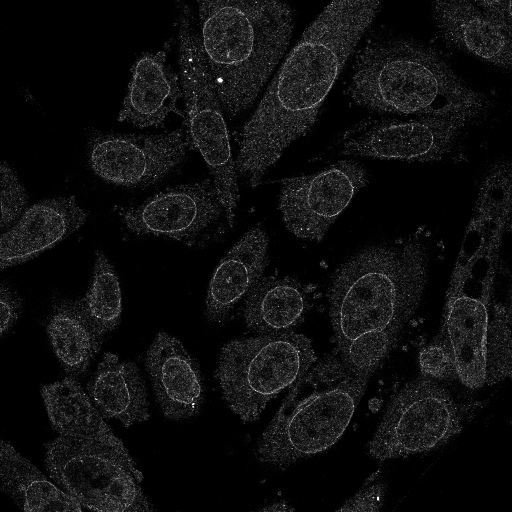

In [115]:
test = np.reshape(image_arrays, newshape=(3, 4, 512, 512))
check = np.asarray(Image.open(r"D:\kaggle-kaggle-protien-data\scripts\practice-images\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png"))
np.allclose(test[0,0,:,:],check)
Image.fromarray(test[2,1,:,:])

In [ ]:
rootdir = r"D:\kaggle-kaggle-protien-data\train"

image_arrays = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
#         print(subdir + os.sep + file)
        filepath = subdir + os.sep + file
#         print(np.asarray(Image.open(filepath)))
        imarr = np.asarray(Image.open(filepath))
        image_arrays.append(imarr)

In [ ]:
len(image_arrays)

In [ ]:
# import imageio
# rootdir = "D:\kaggle-kaggle-protien-data\scripts"
# for subdir, dirs, files in os.walk(rootdir):
#     for file in files:
# #         #print os.path.join(subdir, file)
#         filepath = subdir + os.sep + file

#         if filepath.endswith(".png"):
#             print(file)
#             print(filepath)
#             img = imageio.imread(filepath)
#             print(img)
#             plt.figure(figsize=(10,10))
#             imshow(img)
#             plt.show()

In [ ]:
with open('train_arrays.pkl', 'wb') as f:
    pickle.dump(image_arrays, f)

In [ ]:
import h5py
with h5py.File('image_arrays.h5', 'w', libver='latest') as f:
    for i, arr in enumerate(image_arrays):
        dset = f.create_dataset(str(i), shape=(512, 512), data=arr,
                                chunks=(512,512), compression='gzip', compression_opts=9)

In [ ]:
# with h5py.File('image_arrays.h5', 'w', libver='latest') as f:
#     dset = f.create_dataset()